In [1]:
#these are the libraries for numericals and data manipulation
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Machine Learning and Natural Language Processing Libraries
import scipy
import sklearn as skt
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Deep Learning Libraries
import torch
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F

# Natural Language Toolkit (NLTK)
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')

# Text Processing Libraries
from collections import Counter
import re

# Keras for Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# SpaCy for Natural Language Processing
import spacy

# Image Processing Libraries
import cv2

# Multiprocessing and Threading Libraries
import multiprocessing as mp
import threading

# Additional Libraries
import time
import os

# Enable inline plotting in Jupyter notebooks
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
! pip install -U textblob
! python -m textblob.download_corpora
!pip install pandas textblob matplotlib

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [4]:
! git clone https://github.com/entitize/Fakeddit
! cd Fakeddit

Cloning into 'Fakeddit'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 77 (delta 40), reused 39 (delta 14), pack-reused 0
Receiving objects: 100% (77/77), 14.81 KiB | 240.00 KiB/s, done.
Resolving deltas: 100% (40/40), done.


In [45]:
!ls

Emoji_Dict.p  multimodal_test_public.tsv  multimodal_validate.tsv  sentiment_polarities.csv
Fakeddit      multimodal_train.tsv	  sample_data


In [6]:
!pip install gdown

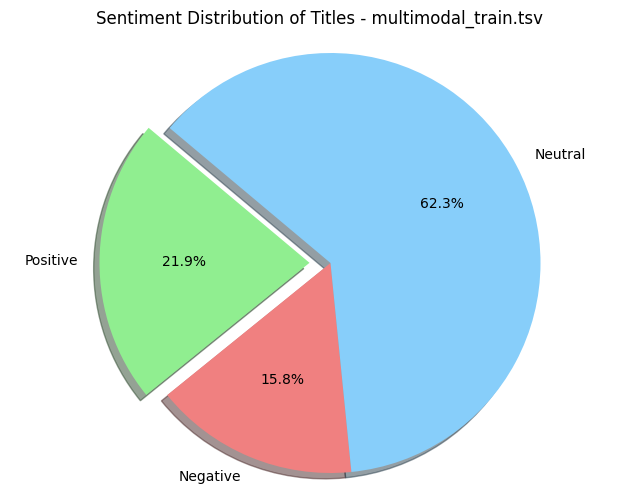

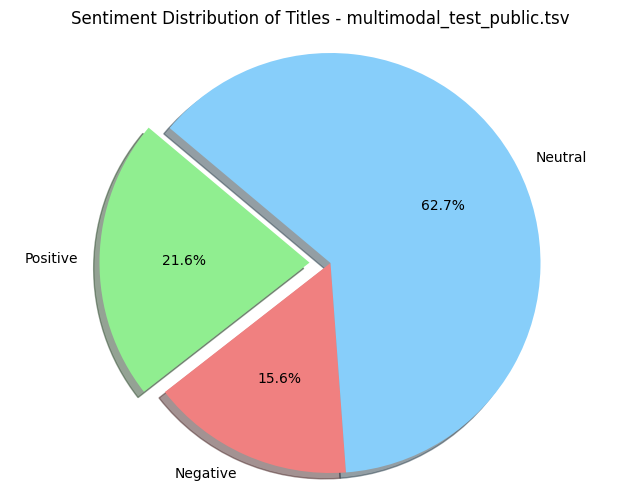

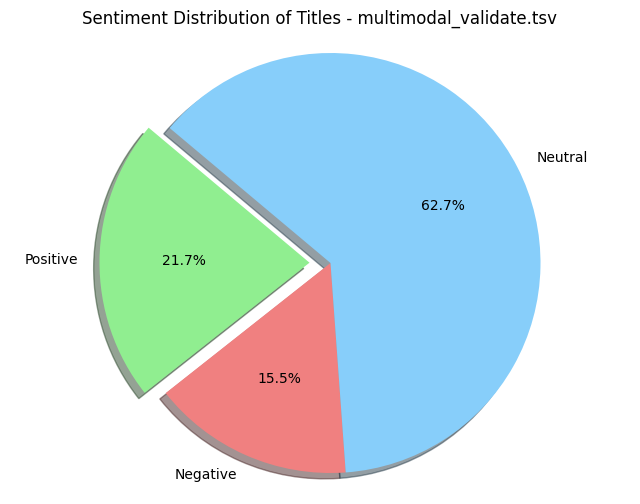

Results for multimodal_train.tsv:
Positive: 96662
Negative: 69452
Neutral: 274527


Results for multimodal_test_public.tsv:
Positive: 12842
Negative: 9276
Neutral: 37201


Results for multimodal_validate.tsv:
Positive: 12905
Negative: 9210
Neutral: 37227




In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

def analyze_sentiment_distribution(df):
    positive = df[df['sentiment_polarity'] > 0].shape[0]
    negative = df[df['sentiment_polarity'] < 0].shape[0]
    neutral = df[df['sentiment_polarity'] == 0].shape[0]
    return positive, negative, neutral

def plot_sentiment_distribution(file, sentiment_counts):
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [sentiment_counts['positive'], sentiment_counts['negative'], sentiment_counts['neutral']]
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0)
    #for showing the first slice above two others

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')  #for equally drawing the circle pie
    plt.title(f'Sentiment Distribution of Titles - {file}')
    plt.show()

def analyze_sentiments_for_files(file_list):
    results = {}

    for file in file_list:
        # Load the dataset with explicit delimiter specification so that we dont have an error because of huge size of dataset
        df = pd.read_csv(file, sep='\t', dtype=str, na_filter=False)

        # Ensure the title column exists in the dataset
        if 'title' not in df.columns:
            raise ValueError(f"The dataset {file} must contain a 'title' column.")

        # Applying the sentiment polarity function to the title column
        df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)

        # Analyzing the sentiment distribution
        positive, negative, neutral = analyze_sentiment_distribution(df)
        results[file] = {'positive': positive, 'negative': negative, 'neutral': neutral}

        # Plotting the sentiment distribution
        plot_sentiment_distribution(file, results[file])

    return results

# List of files to analyze
file_list = ['multimodal_train.tsv', 'multimodal_test_public.tsv', 'multimodal_validate.tsv']

# Run the function and get the results
results = analyze_sentiments_for_files(file_list)

# for Displaying the results
for file, sentiment_counts in results.items():
    print(f"Results for {file}:")
    print(f"Positive: {sentiment_counts['positive']}")
    print(f"Negative: {sentiment_counts['negative']}")
    print(f"Neutral: {sentiment_counts['neutral']}")
    print("\n")


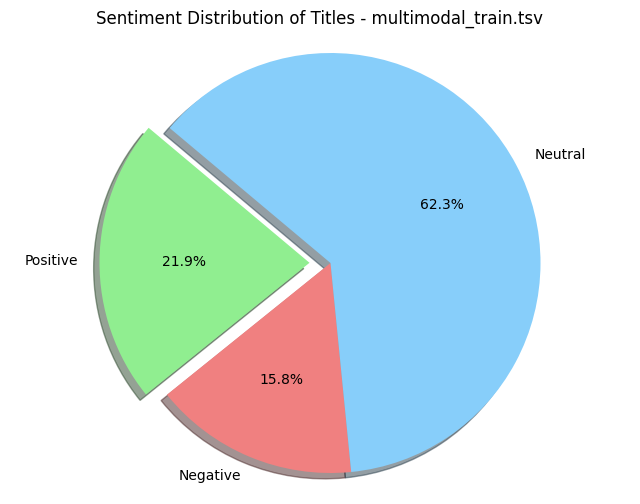

Sentiment Analysis for multimodal_train.tsv

Overall Sentiment Distribution:
Positive: 123532, Negative: 89003, Neutral: 351465

Fake News Sentiment Distribution:
Positive: 74212, Negative: 53835, Neutral: 213872

Real News Sentiment Distribution:
Positive: 49320, Negative: 35168, Neutral: 137593



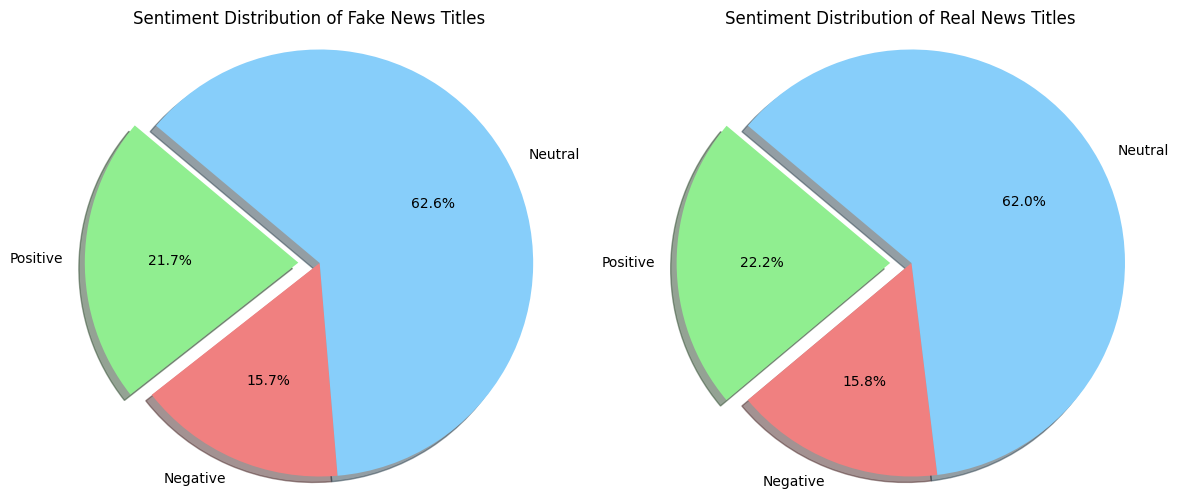

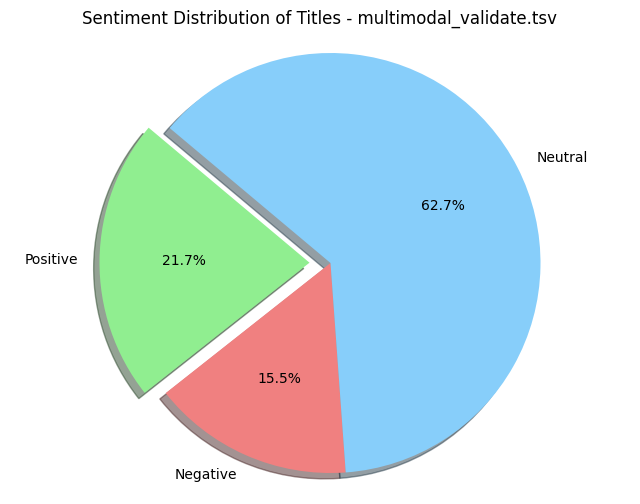

Sentiment Analysis for multimodal_validate.tsv

Overall Sentiment Distribution:
Positive: 12905, Negative: 9210, Neutral: 37227

Fake News Sentiment Distribution:
Positive: 7762, Negative: 5506, Neutral: 22754

Real News Sentiment Distribution:
Positive: 5143, Negative: 3704, Neutral: 14473



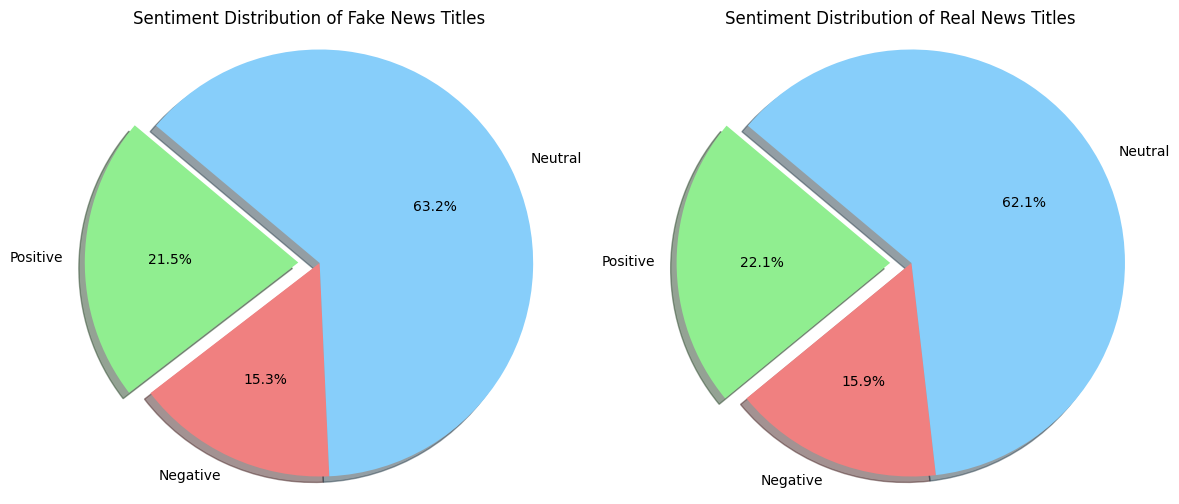

In [9]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

def load_dataset(file_path, delimiter='\t', dtype=str, na_filter=False):
    df = pd.read_csv(file_path, sep=delimiter, dtype=dtype, na_filter=na_filter)
    if 'title' not in df.columns:
        raise ValueError("The dataset must contain a 'title' column.")
    if '2_way_label' not in df.columns:
        raise ValueError("The dataset must contain a 'label' column.")
    return df

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

def analyze_sentiment_distribution(df):
    positive = df[df['sentiment_polarity'] > 0].shape[0]
    negative = df[df['sentiment_polarity'] < 0].shape[0]
    neutral = df[df['sentiment_polarity'] == 0].shape[0]
    return positive, negative, neutral

def plot_sentiment_distribution(title, sentiment_counts, labels=['Positive', 'Negative', 'Neutral'], colors=['lightgreen', 'lightcoral', 'lightskyblue'], explode=(0.1, 0, 0)):
    sizes = [sentiment_counts['positive'], sentiment_counts['negative'], sentiment_counts['neutral']]
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

def perform_analysis(file_path):
    df = load_dataset(file_path)

    # Applying the sentiment polarity function to the title column
    df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)

    # for Analyzing overall sentiment distribution
    overall_sentiments = analyze_sentiment_distribution(df)
    plot_sentiment_distribution(f'Sentiment Distribution of Titles - {file_path}', {'positive': overall_sentiments[0], 'negative': overall_sentiments[1], 'neutral': overall_sentiments[2]})

    #for Analyzing sentiment distribution for fake and real news titles
    fake_news = df[df['2_way_label'] == '0']
    real_news = df[df['2_way_label'] == '1']

    fake_sentiments = analyze_sentiment_distribution(fake_news)
    real_sentiments = analyze_sentiment_distribution(real_news)

    # to visualize the results of the code
    print(f"Sentiment Analysis for {file_path}\n")
    print("Overall Sentiment Distribution:")
    print(f"Positive: {overall_sentiments[0]}, Negative: {overall_sentiments[1]}, Neutral: {overall_sentiments[2]}\n")

    print("Fake News Sentiment Distribution:")
    print(f"Positive: {fake_sentiments[0]}, Negative: {fake_sentiments[1]}, Neutral: {fake_sentiments[2]}\n")

    print("Real News Sentiment Distribution:")
    print(f"Positive: {real_sentiments[0]}, Negative: {real_sentiments[1]}, Neutral: {real_sentiments[2]}\n")

    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.pie([fake_sentiments[0], fake_sentiments[1], fake_sentiments[2]], explode=(0.1, 0, 0), labels=['Positive', 'Negative', 'Neutral'], colors=['lightgreen', 'lightcoral', 'lightskyblue'], autopct='%1.1f%%', shadow=True, startangle=140)
    ax1.axis('equal')
    ax1.set_title('Sentiment Distribution of Fake News Titles')

    ax2.pie([real_sentiments[0], real_sentiments[1], real_sentiments[2]], explode=(0.1, 0, 0), labels=['Positive', 'Negative', 'Neutral'], colors=['lightgreen', 'lightcoral', 'lightskyblue'], autopct='%1.1f%%', shadow=True, startangle=140)
    ax2.axis('equal')
    ax2.set_title('Sentiment Distribution of Real News Titles')

    plt.show()

def main(file_paths):
    for file_path in file_paths:
        perform_analysis(file_path)

# List of files to analyze
file_paths = ['multimodal_train.tsv', 'multimodal_validate.tsv']

# Run the main function
main(file_paths)


In [10]:
import pandas as pd
from textblob import TextBlob

# Load the dataset using pandas library
# 'file_path' is the path to the dataset file
# 'sep' specifies the delimiter used in the file (tab-separated in this case)
# 'dtype=str' ensures that all columns are read as strings
# 'na_filter=False' allows to keep rows with missing values
file_path = 'multimodal_train.tsv'
df = pd.read_csv(file_path, sep='\t', dtype=str, na_filter=False)

# Check if the 'title' column exists in the dataset
# If the column is not present, raise a ValueError
if 'title' not in df.columns:
    raise ValueError("The dataset must contain a 'title' column.")

# Define a function to calculate the sentiment polarity of a given text using TextBlob library
# The function takes a text as input and returns the sentiment polarity score
# The sentiment polarity score ranges from -1 (negative) to 1 (positive)
def get_sentiment_polarity(text):

    return TextBlob(text).sentiment.polarity

# Apply the 'get_sentiment_polarity' function to the 'title' column of the DataFrame
# The 'apply' method applies the function to each element of the 'title' column
# The result is stored in a new column named 'sentiment_polarity'
df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)

# Print the DataFrame with columns 'title' and 'sentiment_polarity'
# This will display the titles and their corresponding sentiment polarity scores
print(df[['title', 'sentiment_polarity']])

                                                    title  sentiment_polarity
0       My Walgreens offbrand Mucinex was engraved wit...               0.000
1                     This concerned sink with a tiny hat               0.000
2           Hackers leak emails from UAE ambassador to US               0.000
3                      PsBattle: Puppy taking in the view               0.000
4                   I found a face in my sheet music too!               0.000
...                                                   ...                 ...
563995                    The sky was dabbing on me today               0.000
563996  Found this guy after moving my shower caddy of...               0.000
563997  PsBattle: A Squirrel's Imprint In Wet Concrete...               0.025
563998        He keeps an eye on the burner whilst I cook               0.000
563999                                               Mr.G               0.000

[564000 rows x 2 columns]


In [11]:
import pandas as pd
from textblob import TextBlob
from tabulate import tabulate

# Ensure to install tabulate if not already installed
# The 'tabulate' library is used to create formatted tables for better data representation

# Load the dataset using pandas library
# 'file_path' is the path to the dataset file
# 'sep' specifies the delimiter used in the file (tab-separated in this case)
# 'dtype=str' ensures that all columns are read as strings
# 'na_filter=False' allows to keep rows with missing values
file_path = 'multimodal_train.tsv'
df = pd.read_csv(file_path, sep='\t', dtype=str, na_filter=False)

# Check if the 'title' column exists in the dataset
# If the column is not present, raise a ValueError
if 'title' not in df.columns:
    raise ValueError("The dataset must contain a 'title' column.")

# Define a function to calculate the sentiment polarity of a given text using TextBlob library
# The function takes a text as input and returns the sentiment polarity score
# The sentiment polarity score ranges from -1 (negative) to 1 (positive)
def get_sentiment_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply the 'get_sentiment_polarity' function to the 'title' column of the DataFrame
# The 'apply' method applies the function to each element of the 'title' column
# The result is stored in a new column named 'sentiment_polarity'
df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)

# Prepare data for tabulation
# Create an empty list to store the data for tabulation
table_data = []
# Iterate over the first 100 rows of the DataFrame
for index, row in df.head(100).iterrows():
    # For each row, append a list containing the row index, title, and sentiment polarity (formatted to 4 decimal places)
    table_data.append([index+1, row['title'], f"{row['sentiment_polarity']:.4f}"])

# Define the headers for the tabulated data
headers = ["Index", "Title", "Sentiment Polarity"]

# Print titles and their sentiment polarities in a table
# 'tabulate' function from the 'tabulate' library is used to create a formatted table
# 'table_data' contains the data to be displayed in the table
# 'headers' specifies the column names for the table
# 'tablefmt="pretty"' sets the formatting style for the table
print(tabulate(table_data, headers=headers, tablefmt="pretty"))

+-------+--------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Index |                                                             Title                                                              | Sentiment Polarity |
+-------+--------------------------------------------------------------------------------------------------------------------------------+--------------------+
|   1   |                  My Walgreens offbrand Mucinex was engraved with the letters Mucinex but in a different order                  |       0.0000       |
|   2   |                                              This concerned sink with a tiny hat                                               |       0.0000       |
|   3   |                                         Hackers leak emails from UAE ambassador to US                                          |       0.0000       |
|   4   |                               

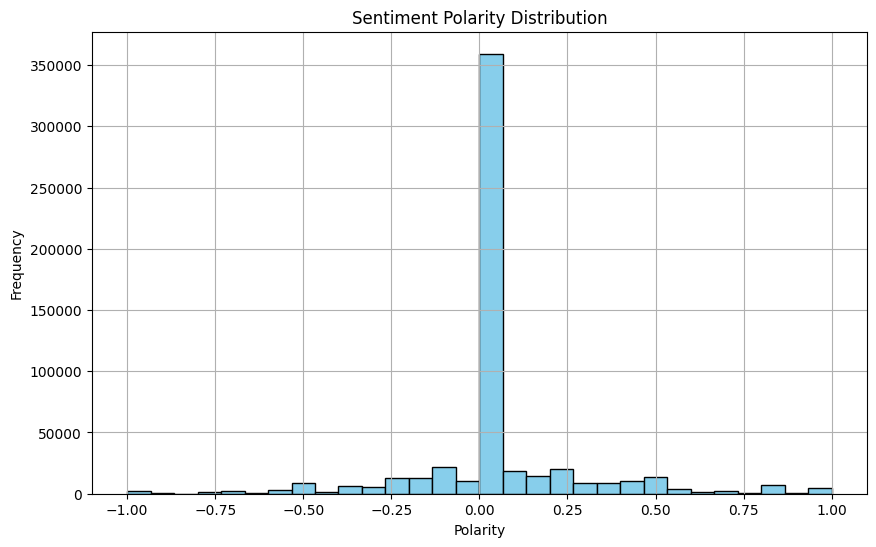

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
file_path = 'multimodal_train.tsv'
df = pd.read_csv(file_path, sep='\t', dtype=str, na_filter=False)

# Ensure 'title' column exists in the dataset
if 'title' not in df.columns:
    raise ValueError("The dataset must contain a 'title' column.")

# Function to calculate sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment polarity function to 'title' column
df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)

# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


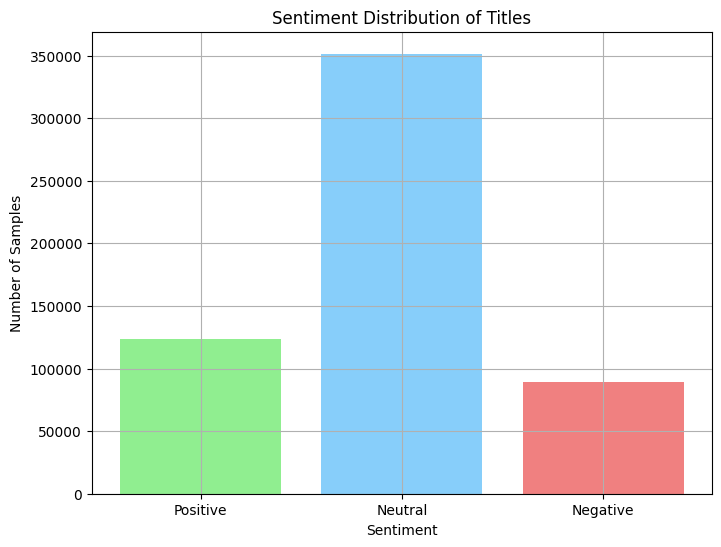

Total number of samples: 564000
Number of samples with positive polarity (> 0.0): 123532 (21.90%)
Number of samples with neutral polarity (0.0): 351465 (62.32%)
Number of samples with negative polarity (< 0.0): 89003 (15.78%)


In [13]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to load the dataset
def load_dataset(file_path, delimiter='\t', dtype=str, na_filter=False):
    df = pd.read_csv(file_path, sep=delimiter, dtype=dtype, na_filter=na_filter)  # Read the dataset file
    if 'title' not in df.columns:  # Check if 'title' column exists
        raise ValueError("The dataset must contain a 'title' column.")
    return df  # Return the loaded dataset

# Function to get sentiment polarity of text
def get_sentiment_polarity(text):
    return TextBlob(str(text)).sentiment.polarity  # Calculate sentiment polarity using TextBlob

# Function to calculate sentiment distribution
def calculate_sentiment_distribution(df):
    df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)  # Calculate sentiment polarity for each title
    positive_count = df[df['sentiment_polarity'] > 0.0].shape[0]  # Count positive sentiment samples
    neutral_count = df[df['sentiment_polarity'] == 0.0].shape[0]  # Count neutral sentiment samples
    negative_count = df[df['sentiment_polarity'] < 0.0].shape[0]  # Count negative sentiment samples
    return positive_count, neutral_count, negative_count  # Return the counts

# Function to plot sentiment distribution
def plot_sentiment_distribution(positive_count, neutral_count, negative_count):
    labels = ['Positive', 'Neutral', 'Negative']  # Labels for sentiment categories
    sizes = [positive_count, neutral_count, negative_count]  # Sizes (counts) for each category
    colors = ['lightgreen', 'lightskyblue', 'lightcoral']  # Colors for each category

    plt.figure(figsize=(8, 6))  # Set figure size
    plt.bar(labels, sizes, color=colors)  # Create a bar plot
    plt.title('Sentiment Distribution of Titles')  # Set title
    plt.xlabel('Sentiment')  # Set x-axis label
    plt.ylabel('Number of Samples')  # Set y-axis label
    plt.grid(True)  # Add grid lines
    plt.show()  # Show the plot

# Function to print sentiment statistics
def print_sentiment_statistics(total_count, positive_count, neutral_count, negative_count):
    print(f"Total number of samples: {total_count}")  # Print total number of samples
    print(f"Number of samples with positive polarity (> 0.0): {positive_count} ({positive_count / total_count * 100:.2f}%)")  # Print positive sentiment count and percentage
    print(f"Number of samples with neutral polarity (0.0): {neutral_count} ({neutral_count / total_count * 100:.2f}%)")  # Print neutral sentiment count and percentage
    print(f"Number of samples with negative polarity (< 0.0): {negative_count} ({negative_count / total_count * 100:.2f}%)")  # Print negative sentiment count and percentage

# Main function
def main(file_path):
    df = load_dataset(file_path)  # Load the dataset
    positive_count, neutral_count, negative_count = calculate_sentiment_distribution(df)  # Calculate sentiment distribution
    plot_sentiment_distribution(positive_count, neutral_count, negative_count)  # Plot sentiment distribution
    print_sentiment_statistics(len(df), positive_count, neutral_count, negative_count)  # Print sentiment statistics

# Run the main function with the dataset file path
main('multimodal_train.tsv')

In [14]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = 'multimodal_train.tsv'
df = pd.read_csv(file_path, sep='\t', dtype=str, na_filter=False)

# Ensure 'title' column exists in the dataset
if 'title' not in df.columns:
    raise ValueError("The dataset must contain a 'title' column.")

# Function to calculate sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment polarity function to 'title' column
df['sentiment_polarity'] = df['title'].apply(get_sentiment_polarity)

# Save sentiment polarities to a CSV file
output_file = 'sentiment_polarities.csv'
df[['title', 'sentiment_polarity']].to_csv(output_file, index=False)

print(f"Sentiment polarities saved to '{output_file}'")

Sentiment polarities saved to 'sentiment_polarities.csv'


In [22]:
# Function to remove '' from the text
def remove_hash(text1):
    return text1.replace("''", "")

# Function to remove ' from the text
def remove_tag(text2):
    return text2.replace("'", "")

# Another function to remove ' from the text (potentially redundant with remove_tag)
def remove_tag(text33):
    return text33.replace("'", "")

# Function to replace underscores with spaces in the text
def remove_underscore(text):
    return text.replace("_", " ")

In [15]:
# Train data
traindata_all = pd.read_csv('multimodal_train.tsv', sep='\t')
# Validation data
validata_all = pd.read_csv('multimodal_validate.tsv', sep='\t')
# Test data
testdata_all = pd.read_csv('multimodal_test_public.tsv', sep='\t')

In [16]:
# Train data with no missing values
train_data = traindata_all[traindata_all['title'].notnull().to_numpy()]
# Validation data with no missing values
valid_data = validata_all[validata_all['title'].notnull().to_numpy()]
# Test data with no missing values
test_data = testdata_all[testdata_all['title'].notnull().to_numpy()]

In [17]:
## Train data
train_news = list(train_data['title'])
train_labels = list(train_data['6_way_label'])
train_images = list(train_data['id'])
## Valid data
valid_news = list(valid_data['title'])
valid_labels = list(valid_data['6_way_label'])
valid_images = list(valid_data['id'])
## Test data
test_news = list(test_data['title'])
test_labels = list(test_data['6_way_label'])
test_images = list(test_data['id'])

In [18]:
print("First 3 train news:")
for i in range(min(3, len(train_news))):
    print(train_news[i])

print("\nFirst 3 valid news:")
for i in range(min(3, len(valid_news))):
    print(valid_news[i])

print("\nFirst 3 test news:")
for i in range(min(3, len(test_news))):
    print(test_news[i])

First 3 train news:
My Walgreens offbrand Mucinex was engraved with the letters Mucinex but in a different order
This concerned sink with a tiny hat
Hackers leak emails from UAE ambassador to US

First 3 valid news:
My Xbox controller says hi
PsBattle: New image from The Mandalorian
Say hello to my little friend!

First 3 test news:
stargazer 
yeah
PD: Phoenix car thief gets instructions from YouTube video


In [19]:
# Train
train_images_final = [image + '.jpg' for image in train_images]
# Validation
valid_images_final = [image + '.jpg' for image in valid_images]
# Test
test_images_final = [image + '.jpg' for image in test_images]

##Preprocessing
First we neet to preprocess the text that we will feed to the neural network. We define a function to preprocess the data. We remove punctuations, numbers and also multiple spaces.

In [21]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [23]:
# Remove puntuations and numbers and multiple spaces

train_news_clean_1 = []
valid_news_clean_1 = []
test_news_clean_1 = []
# Train
for new in train_news:
    train_news_clean_1.append(preprocess_text(new))
# Validation
for new in valid_news:
    valid_news_clean_1.append(preprocess_text(new))
# Test
for new in test_news:
    test_news_clean_1.append(preprocess_text(new))

In [24]:
import pandas as pd
import re

def preprocess_text(text):

    # Remove punctuations and numbers
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))

    # Remove multiple spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    return cleaned_text.strip()

# Load the dataset
file_path = 'multimodal_train.tsv'
df = pd.read_csv(file_path, sep='\t', nrows=5)  # Load only the first 5 rows

# Check if 'title' column exists
if 'title' not in df.columns:
    raise ValueError("The dataset must contain a 'title' column.")

# Preprocess the 'title' column
df['title_preprocessed'] = df['title'].apply(preprocess_text)

# Print the preprocessed data
print("Preprocessed titles:")
print(df['title_preprocessed'])

Preprocessed titles:
0    My Walgreens offbrand Mucinex was engraved wit...
1                  This concerned sink with a tiny hat
2        Hackers leak emails from UAE ambassador to US
3                    PsBattle Puppy taking in the view
4                 I found a face in my sheet music too
Name: title_preprocessed, dtype: object


In [25]:
# Initialize  lemmatizer and  stop_words

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords_lem(text):
    text = word_tokenize(text)
    # Remove stopwords
    text = [word for word in text if word not in stop_words]
    # Lematization
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos = "n")
        word2 = lemmatizer.lemmatize(word1, pos = "v")
        word3 = lemmatizer.lemmatize(word2, pos = ("a"))
        lemmatized_text.append(word3)

    text_done = ' '.join(lemmatized_text)
    return text_done

In [26]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
file_path = 'multimodal_train.tsv'
df = pd.read_csv(file_path, sep='\t', nrows=20)  # Load only the first 20 rows

# Check if 'title' column exists
if 'title' not in df.columns:
    raise ValueError("The dataset must contain a 'title' column.")

# Initialize lemmatizer and stop_words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and perform lemmatization
def remove_stopwords_lem(text):
    text = word_tokenize(text)
    # Remove stopwords
    text = [word for word in text if word not in stop_words]
    # Lemmatization
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos="n")
        word2 = lemmatizer.lemmatize(word1, pos="v")
        word3 = lemmatizer.lemmatize(word2, pos="a")
        lemmatized_text.append(word3)
    text_done = ' '.join(lemmatized_text)
    return text_done

# Apply the function to the 'title' column
df['title_processed'] = df['title'].apply(remove_stopwords_lem)

# Print the processed titles
print("Processed titles:")
print(df['title_processed'])

Processed titles:
0     My Walgreens offbrand Mucinex engrave letter M...
1                            This concern sink tiny hat
2                  Hackers leak email UAE ambassador US
3                            PsBattle : Puppy take view
4                             I find face sheet music !
5            Bride groom exchange vow fatal shoot wed .
6                                         major thermos
7     Rabbi : Meat clone pig could kosher Jews eat –...
8                                                cutout
9     Jesus Christ convert local teen Christianity r...
10    « Victory , The great european crusade » , Vic...
11    English Village Becomes Climate Leader Quietly...
12                                      ai n't fly moon
13                            Seven Doggly Sins - Sloth
14     Cutest baby cow I 've see head day enjoy Destiny
15    PsBattle : Asian girl wear virtual reality gog...
16                    The way rain make silhouette bike
17    How To Self-Diagnose You

In [27]:
# Stop-words removal and lemmatization
train_stwrd_lem = []
valid_stwrd_lem = []
test_stwrd_lem = []

# Train
for new in train_news_clean_1:
    train_stwrd_lem.append(remove_stopwords_lem(new))
# Validation
for new in valid_news_clean_1:
    valid_stwrd_lem.append(remove_stopwords_lem(new))
# Test
for new in test_news_clean_1:
    test_stwrd_lem.append(remove_stopwords_lem(new))

In [29]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the datasets
train_file = 'multimodal_train.tsv'
valid_file = 'multimodal_validate.tsv'
test_file = 'multimodal_test_public.tsv'

train_data = pd.read_csv(train_file, sep='\t', nrows=20)
valid_data = pd.read_csv(valid_file, sep='\t', nrows=20)
test_data = pd.read_csv(test_file, sep='\t', nrows=20)

# Check if 'title' column exists
if 'title' not in train_data.columns or 'title' not in valid_data.columns or 'title' not in test_data.columns:
    raise ValueError("The datasets must contain a 'title' column.")

# Initialize lemmatizer and stop_words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and perform lemmatization
def remove_stopwords_lem(text):
    text = word_tokenize(text)
    # Remove stopwords
    text = [word for word in text if word not in stop_words]
    # Lemmatization
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos="n")
        word2 = lemmatizer.lemmatize(word1, pos="v")
        word3 = lemmatizer.lemmatize(word2, pos="a")
        lemmatized_text.append(word3)
    text_done = ' '.join(lemmatized_text)
    return text_done

# Stop-words removal and lemmatization
train_stwrd_lem = []
valid_stwrd_lem = []
test_stwrd_lem = []

# Train
for title in train_data['title']:
    train_stwrd_lem.append(remove_stopwords_lem(title))

# Validation
for title in valid_data['title']:
    valid_stwrd_lem.append(remove_stopwords_lem(title))

# Test
for title in test_data['title']:
    test_stwrd_lem.append(remove_stopwords_lem(title))

# Print the processed data
print("Processed train titles:")
print('\n'.join(train_stwrd_lem))

print("\nProcessed valid titles:")
print('\n'.join(valid_stwrd_lem))

print("\nProcessed test titles:")
print('\n'.join(test_stwrd_lem))

Processed train titles:
My Walgreens offbrand Mucinex engrave letter Mucinex different order
This concern sink tiny hat
Hackers leak email UAE ambassador US
PsBattle : Puppy take view
I find face sheet music !
Bride groom exchange vow fatal shoot wed .
major thermos
Rabbi : Meat clone pig could kosher Jews eat – milk
cutout
Jesus Christ convert local teen Christianity repaint colorize ( circa 1 AD )
« Victory , The great european crusade » , Vichy France , 1944
English Village Becomes Climate Leader Quietly Cleaning Up Its Own Patch
ai n't fly moon
Seven Doggly Sins - Sloth
Cutest baby cow I 've see head day enjoy Destiny
PsBattle : Asian girl wear virtual reality goggle hold surprise look cat .
The way rain make silhouette bike
How To Self-Diagnose Yourself With Mental Illness 3 Easy Steps
`` Love peace Washington way '' Soviet Union , 1970
A view London see Strangers bar Palace Westminster .

Processed valid titles:
My Xbox controller say hi
PsBattle : New image The Mandalorian
Say h

In [30]:
news_all = train_stwrd_lem + valid_stwrd_lem + test_stwrd_lem

tokenizer = Tokenizer(num_words = 128022)
tokenizer.fit_on_texts(news_all)

# Tokenize news

# Train
train_tokenized = tokenizer.texts_to_sequences(train_stwrd_lem)
# Validation
valid_tokenized = tokenizer.texts_to_sequences(valid_stwrd_lem)
# Test
test_tokenized = tokenizer.texts_to_sequences(test_stwrd_lem)

In [31]:
print("Vocabulary length: ", len(tokenizer.word_index))

Vocabulary length:  322


In [32]:
# Pad/truncate the tokenized news

# Train
train_tokenized_pad = pad_sequences(train_tokenized, maxlen = 15, truncating = 'post', padding = 'post')
# Validation
valid_tokenized_pad = pad_sequences(valid_tokenized, maxlen = 15, truncating = 'post', padding = 'post')
# Test
test_tokenized_pad = pad_sequences(test_tokenized, maxlen = 15, truncating = 'post', padding = 'post')

In [34]:
import pandas as pd
def remove_hash(text):
    if isinstance(text, str):  # Check if text is a string
        return text.replace("#", "")
    else:
        return ""

# Load your dataset 'all_train.tsv'
file_path = 'multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')

# Apply function to 'title' column after handling NaN
data['title'] = data['title'].fillna('').apply(remove_hash)

# Print the first few rows of the modified DataFrame
print(data.head())


           author                                        clean_title  \
0     Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1        VIDCAs17                this concerned sink with a tiny hat   
2  prometheus1123      hackers leak emails from uae ambassador to us   
3             NaN                           puppy taking in the view   
4       3rikR3ith               i found a face in my sheet music too   

    created_utc         domain  hasImage      id  \
0  1.551641e+09    i.imgur.com      True  awxhir   
1  1.534727e+09      i.redd.it      True  98pbid   
2  1.496511e+09  aljazeera.com      True  6f2cy5   
3  1.471341e+09    i.imgur.com      True  4xypkv   
4  1.525318e+09      i.redd.it      True  8gnet9   

                                           image_url linked_submission_id  \
0  https://external-preview.redd.it/WylDbZrnbvZdB...                  NaN   
1  https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...                  NaN   
2  https://external-pre

In [35]:
import pandas as pd

# Example function to remove specific characters from text
def remove_newlines_tabs(text):


    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return formatted_text

# Load your dataset 'all_train.tsv'
file_path = 'multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')

# Apply function to relevant columns after handling NaN (adjust 'title' to your actual column name)
data['title'] = data['title'].fillna('').apply(remove_newlines_tabs)

# Print the first few rows of the modified DataFrame
print(data.head())


           author                                        clean_title  \
0     Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1        VIDCAs17                this concerned sink with a tiny hat   
2  prometheus1123      hackers leak emails from uae ambassador to us   
3             NaN                           puppy taking in the view   
4       3rikR3ith               i found a face in my sheet music too   

    created_utc         domain  hasImage      id  \
0  1.551641e+09    i.imgur.com      True  awxhir   
1  1.534727e+09      i.redd.it      True  98pbid   
2  1.496511e+09  aljazeera.com      True  6f2cy5   
3  1.471341e+09    i.imgur.com      True  4xypkv   
4  1.525318e+09      i.redd.it      True  8gnet9   

                                           image_url linked_submission_id  \
0  https://external-preview.redd.it/WylDbZrnbvZdB...                  NaN   
1  https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...                  NaN   
2  https://external-pre

In [36]:
import pandas as pd
from bs4 import BeautifulSoup

# Example function to remove HTML tags from text
def strip_html_tags(text):

    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

file_path = 'multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')

# Applying the function to the title column
data['title'] = data['title'].fillna('').apply(strip_html_tags)
data['clean_title'] = data['clean_title'].fillna('').apply(strip_html_tags)

# Print the first few rows of the modified DataFrame to verify
print(data.head())


<ipython-input-36-d4cbe62145e5>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-36-d4cbe62145e5>:20: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


           author                                        clean_title  \
0     Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1        VIDCAs17                this concerned sink with a tiny hat   
2  prometheus1123      hackers leak emails from uae ambassador to us   
3             NaN                           puppy taking in the view   
4       3rikR3ith               i found a face in my sheet music too   

    created_utc         domain  hasImage      id  \
0  1.551641e+09    i.imgur.com      True  awxhir   
1  1.534727e+09      i.redd.it      True  98pbid   
2  1.496511e+09  aljazeera.com      True  6f2cy5   
3  1.471341e+09    i.imgur.com      True  4xypkv   
4  1.525318e+09      i.redd.it      True  8gnet9   

                                           image_url linked_submission_id  \
0  https://external-preview.redd.it/WylDbZrnbvZdB...                  NaN   
1  https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...                  NaN   
2  https://external-pre

In [38]:
import pandas as pd
import re

# Example function to remove extra whitespaces
def remove_whitespace(text):

    pattern = re.compile(r'\s+')
    without_whitespace = re.sub(pattern, ' ', text)
    # Replace some specific cases to ensure correct tokenization
    without_whitespace = without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return without_whitespace

# Load your dataset 'all_train.tsv'
file_path = 'multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')

# Check the actual column names present in your DataFrame
print(data.columns)

#applying function ot the title column from the dataset
if 'title' in data.columns:
    data['title'] = data['title'].fillna('').apply(remove_whitespace)

# Print the first few rows of the modified DataFrame to verify
print(data.head())


Index(['author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')
           author                                        clean_title  \
0     Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1        VIDCAs17                this concerned sink with a tiny hat   
2  prometheus1123      hackers leak emails from uae ambassador to us   
3             NaN                           puppy taking in the view   
4       3rikR3ith               i found a face in my sheet music too   

    created_utc         domain  hasImage      id  \
0  1.551641e+09    i.imgur.com      True  awxhir   
1  1.534727e+09      i.redd.it      True  98pbid   
2  1.496511e+09  aljazeera.com      True  6f2cy5   
3  1.471341e+09    i.imgur.com      True  4xypkv   
4  1.525318e+09      i.redd.it      True  8

In [40]:
import pandas as pd
from tabulate import tabulate

# Example function to remove whitespace from text
def remove_whitespace(text):
    if isinstance(text, str):  # Check if text is a string
        return text.strip()  # Remove leading and trailing whitespace
    else:
        return ""  # Return empty string for non-string values


file_path = 'multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')

# Apply function to 'title' column after handling NaN
data['title'] = data['title'].fillna('').apply(remove_whitespace)

# Limit the display to 50 rows for brevity
limited_data = data.head(50)

# Convert DataFrame to tabular format
table = tabulate(limited_data, headers='keys', tablefmt='fancy_grid')

# Print the tabulated DataFrame
print(table)


╒════╤═════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════╤═══════════════════╤════════════╤═════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════╤════════════════╤═════════╤══════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╕
│    │ author              │ clean_title                                                                                                              │   created_utc │ domain            │ hasImage   │ id      │ image_url                                                                                                                                               

In [41]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tabulate import tabulate

# Load NLTK stopwords for English
stoplist = stopwords.words('english')

# Example function to remove stopwords from text
def removing_stopwords(text):

    # Tokenize the text and remove stopwords
    tokens = word_tokenize(text)
    tokens_without_stopwords = [word for word in tokens if word.lower() not in stoplist]
    # Join tokens_without_stopwords into a single string
    text_without_stopwords = ' '.join(tokens_without_stopwords)
    return text_without_stopwords


In [43]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tabulate import tabulate

# Load NLTK stopwords for English
stoplist = stopwords.words('english')

# Example function to remove stopwords from text
def removing_stopwords(text):

    # Tokenize the text and remove stopwords
    tokens = word_tokenize(text)
    tokens_without_stopwords = [word for word in tokens if word.lower() not in stoplist]
    # Join tokens_without_stopwords into a single string
    text_without_stopwords = ' '.join(tokens_without_stopwords)
    return text_without_stopwords

# Load your dataset 'all_train.tsv'
file_path = 'multimodal_train.tsv'
data = pd.read_csv(file_path, sep='\t')

# Check column names to ensure the correct reference
print(data.columns)

#apply the function to title column

data['title'] = data['title'].fillna('').apply(removing_stopwords)

# Print the modified DataFrame with a limit of 10 rows
print(tabulate(data.head(10), headers='keys', tablefmt='pretty'))


Index(['author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')
+---+-----------------+----------------------------------------------------------------------------------------------+--------------+-------------------+----------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+--------------+-------+-------------------+-------------------------------------------------------------------------------------+--------------+-------------+-------------+-------------+
|   |     author      |                                         clean_title                                          | created_utc  |      domain       | hasImage |   id    |                     

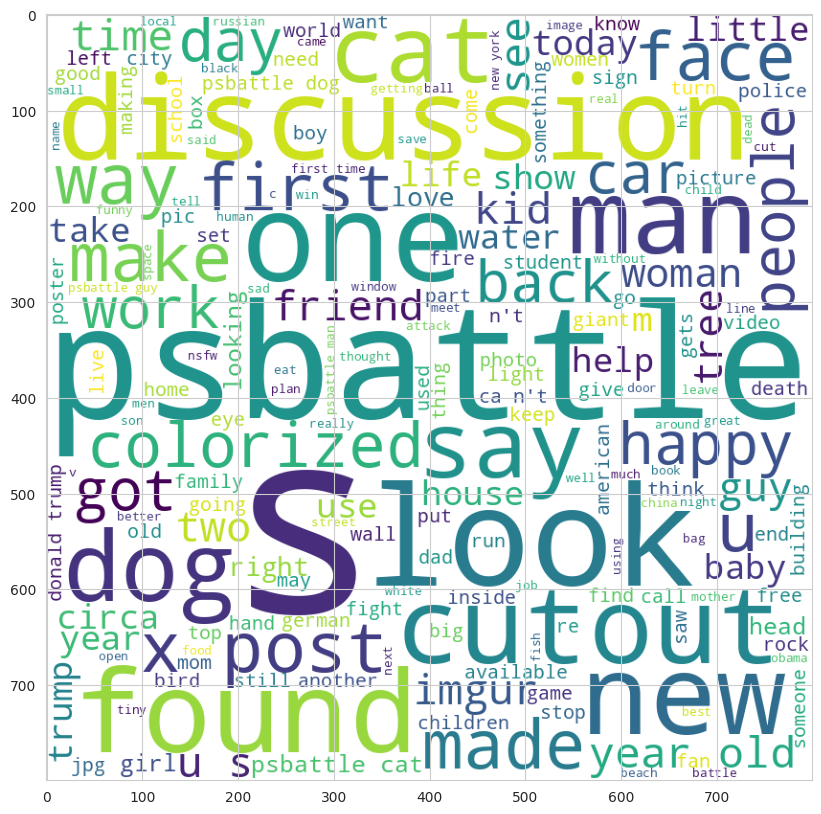

In [44]:

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads
df = data

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.title:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("on")
plt.tight_layout(pad = 0)

plt.show()